In [1]:
from model import *
import matplotlib.pyplot as plt
import time

In [2]:
def get_negative_samples(model, call_back=0.5):
    """Get the negative samples from model for visualization

    Args:
        model (Net): the instance of Net
        call_back (float, optional): the call_back rate for positive sampling.

    Returns:
        negative: the negative plot set
    """
    # Calculate the prediction
    positive = []
    negative = []
    for x in np.linspace(-6,6,100):
        for y in np.linspace(-6,6,100):
            pos = [x,y]
            if model.forward(pos) > call_back:
                positive.append(pos)
            else:
                negative.append(pos)
    positive = np.array(positive)
    negative = np.array(negative)
    return negative

In [6]:
def visualize_boundary(model):
    """Visualize the boundary of the model

    Args:
        model (Net): the instance of Net
    """

    negative = get_negative_samples(model)
    
    plt.figure(figsize=(5,5))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.scatter(negative[:,0],negative[:,1],8,"black")
    plt.show()

In [4]:
def plot_error(model):
    """Plot the error log from model

    Args:
        model (Net): the instance of Net
    """
    logs = np.array(model.logs)
    plt.figure()
    plt.plot(logs[:,0],logs[:,1],label="train")
    plt.plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        plt.plot(logs[:,0],logs[:,3],label="test")
    plt.legend()
    plt.show()

In [5]:
net = Net(0.1)

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

net = train(net, train_data, 5000, test_data)

Early Stop  250 | T 0.1217 | V 0.1184:   9%|▉         | 450/5000 [00:24<04:04, 18.60epoch/s]


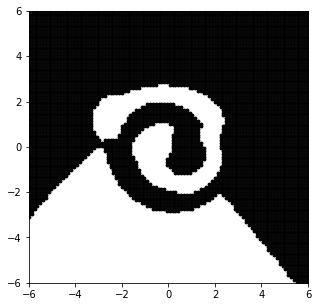

In [6]:
visualize_boundary(net)

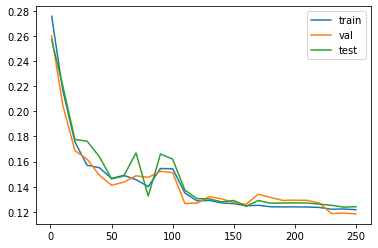

In [7]:
plot_error(net)

## MLQP

Early Stop 1770 | T 0.0437 | V 0.0477:  49%|████▉     | 1970/4000 [01:48<01:51, 18.21epoch/s]
Early Stop 1500 | T 0.1036 | V 0.1025:  42%|████▎     | 1700/4000 [01:37<02:12, 17.37epoch/s]
Early Stop 1220 | T 0.0425 | V 0.0392:  36%|███▌      | 1420/4000 [01:25<02:34, 16.66epoch/s]
Early Stop 1760 | T 0.0855 | V 0.0862:  49%|████▉     | 1960/4000 [01:55<02:00, 16.98epoch/s]
Early Stop 2110 | T 0.0766 | V 0.0761:  58%|█████▊    | 2310/4000 [02:14<01:38, 17.12epoch/s]


lr 0.01 | Avg Time  108s | Avg Test Error 0.1227


Early Stop 3240 | T 0.0904 | V 0.0891:  86%|████████▌ | 3440/4000 [03:26<00:33, 16.66epoch/s]
Early Stop  370 | T 0.1032 | V 0.1030:  14%|█▍        | 570/4000 [00:33<03:20, 17.14epoch/s]
Early Stop  790 | T 0.0995 | V 0.0984:  25%|██▍       | 990/4000 [00:58<02:57, 16.96epoch/s]
Early Stop  610 | T 0.0835 | V 0.0823:  20%|██        | 810/4000 [00:46<03:05, 17.24epoch/s]
Early Stop  420 | T 0.0851 | V 0.0847:  16%|█▌        | 620/4000 [00:36<03:17, 17.10epoch/s]
Early Stop 2860 | T 0.0825 | V 0.0755:  76%|███████▋  | 3060/4000 [03:00<00:55, 16.96epoch/s]


lr 0.05 | Avg Time   71s | Avg Test Error 0.1188


Early Stop 2310 | T 0.0917 | V 0.0894:  63%|██████▎   | 2510/4000 [02:29<01:28, 16.79epoch/s]
Early Stop   70 | T 0.1282 | V 0.1190:   7%|▋         | 270/4000 [00:16<03:44, 16.62epoch/s]
Early Stop  820 | T 0.1060 | V 0.1049:  26%|██▌       | 1020/4000 [00:59<02:53, 17.17epoch/s]
Early Stop  450 | T 0.1236 | V 0.1091:  16%|█▋        | 650/4000 [00:40<03:28, 16.08epoch/s]
Early Stop  180 | T 0.1216 | V 0.1237:  10%|▉         | 380/4000 [00:22<03:33, 16.99epoch/s]
Early Stop  210 | T 0.1282 | V 0.1181:  10%|█         | 410/4000 [00:24<03:30, 17.06epoch/s]


lr 0.10 | Avg Time   32s | Avg Test Error 0.1303


Early Stop  400 | T 0.1191 | V 0.1066:  15%|█▌        | 600/4000 [00:35<03:21, 16.86epoch/s]


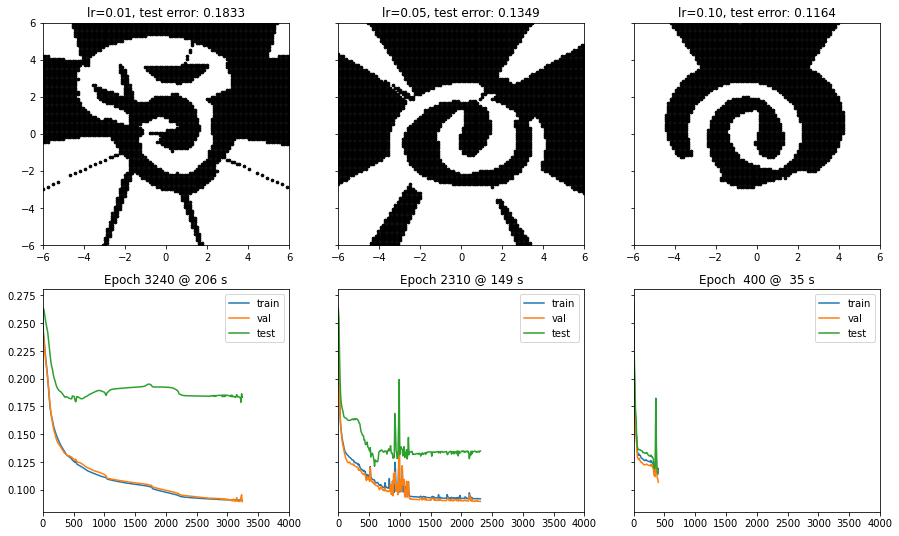

In [8]:
# benchmark

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

RANDOM_SEED = 42
EPOCH_THRESHOLD = 4000

fig, ax = plt.subplots(2, 3, sharey='row', figsize=(15,9))

for i, lr in enumerate([0.01, 0.05, 0.1]):
    # calcute the average training time.
    sum_time = 0.0
    sum_error = 0.0
    for random_seed in [57, 79, 131, 157, 201]:
        net = Net(lr, 0.8, random_seed)
        start_time = time.time()
        train(net, train_data, EPOCH_THRESHOLD)
        elapsed_time = time.time() - start_time
        test_error = test(net, test_data)
        sum_time += elapsed_time
        sum_error += test_error
    print("lr %.2f | Avg Time %4ds | Avg Test Error %.4f" % (lr, sum_time / 5, sum_error / 5))

    # visualize decision boundaries at a given random seed.
    # NOTE: it is not in the part of benchmark
    # since the tracking on test_data is used
    # which may increase the time it processes.
    net = Net(lr, 0.8, RANDOM_SEED)
    start_time = time.time()
    net = train(net, train_data, EPOCH_THRESHOLD, test_data)
    elapsed_time = time.time() - start_time
    test_error = test(net, test_data)

    # visualize
    ax[0,i].set_title("lr=%.2f, test error: %.4f" % (lr, test_error))
    negative = get_negative_samples(net)
    ax[0,i].set_xlim(-6,6)
    ax[0,i].set_ylim(-6,6)
    ax[0,i].scatter(negative[:,0],negative[:,1],7,"black")

    # error
    logs = np.array(net.logs)
    ax[1,i].set_title("Epoch %4d @ %3d s" % (logs[-1][0], elapsed_time))
    ax[1,i].set_xlim(0,EPOCH_THRESHOLD)
    ax[1,i].plot(logs[:,0],logs[:,1],label="train")
    ax[1,i].plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        ax[1,i].plot(logs[:,0],logs[:,3],label="test")
    ax[1,i].legend()

plt.show()

## MIN-MAX

In [2]:
from minmax import *

# Visualize the minmax network.

def visualize_axnet(ax, model, sz=6):
    negative = get_negative_samples(model)
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)
    ax.scatter(negative[:,0],negative[:,1],sz,"black")

def visualize_minmax(train_data, k, epochs, random_seed=None):
    minmax_net, subnets, mins, max_time = minmax(train_data, k, epochs, 0.05, random_seed)
    print("Max Training time for %d split: %4d s" % (k, max_time))
    fig = plt.figure(figsize=(21,9))
    grid = plt.GridSpec(k, 2 * k + 1, wspace=0.3, hspace=0.3)
    for i in range(k):
        for j in range(k):
            ax = plt.subplot(grid[i,j])
            ax.set_title("Subnet (%d,%d)" % (i+1,j+1))
            visualize_axnet(ax,subnets[i][j])
        ax = plt.subplot(grid[i,k])
        ax.set_title("Min (%d)" % (i+1))
        visualize_axnet(ax,mins[i])
    ax = plt.subplot(grid[:,k+1:])
    ax.set_title("Max")
    visualize_axnet(ax,minmax_net,9*k)

    plt.show()
    return minmax_net

Early Stop 1530 | T 0.0997 | V 0.1347:  43%|████▎     | 1730/4000 [00:57<01:16, 29.83epoch/s]
Early Stop 2200 | T 0.0835 | V 0.1075:  60%|██████    | 2400/4000 [01:19<00:52, 30.31epoch/s]
Early Stop 3090 | T 0.1108 | V 0.1335:  82%|████████▏ | 3290/4000 [01:41<00:21, 32.27epoch/s]
Early Stop 1820 | T 0.0937 | V 0.1082:  50%|█████     | 2020/4000 [01:01<01:00, 32.59epoch/s]


Training time for 2 split:  301 s


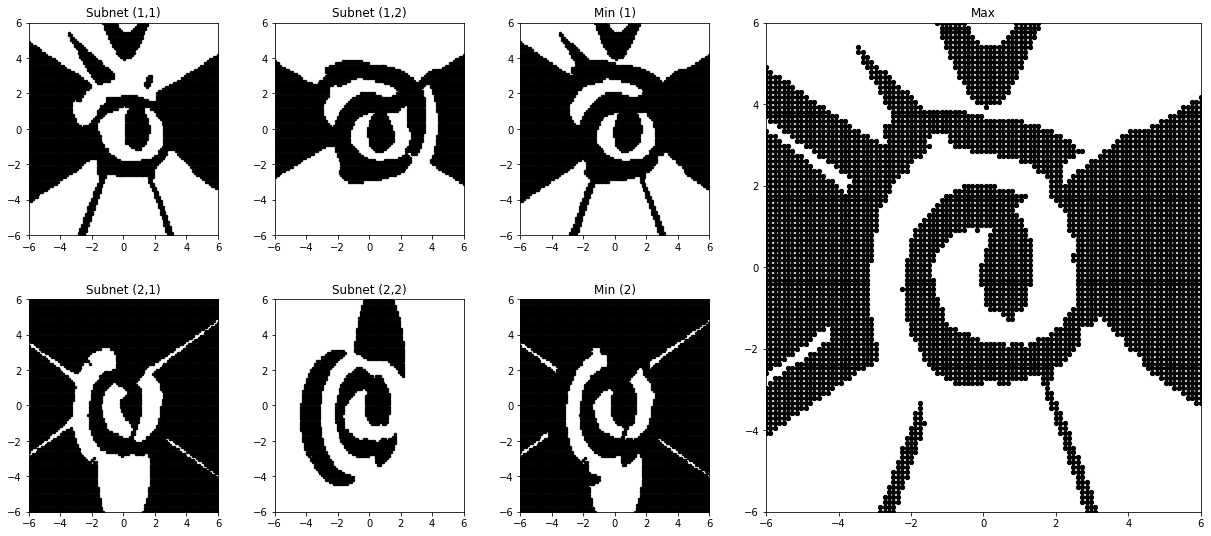

Test Error with 2 split: 0.1242


Early Stop 2600 | T 0.0910 | V 0.1024:  70%|███████   | 2800/4000 [00:54<00:23, 51.70epoch/s]
Early Stop  430 | T 0.1458 | V 0.1848:  16%|█▌        | 630/4000 [00:13<01:10, 47.96epoch/s]
Early Stop 1010 | T 0.0736 | V 0.0786:  30%|███       | 1210/4000 [00:26<01:00, 45.79epoch/s]
Early Stop 1580 | T 0.0827 | V 0.1001:  44%|████▍     | 1780/4000 [00:41<00:51, 42.89epoch/s]
Early Stop 1240 | T 0.0728 | V 0.0764:  36%|███▌      | 1440/4000 [00:39<01:10, 36.30epoch/s]
Early Stop  290 | T 0.0679 | V 0.0782:  12%|█▏        | 490/4000 [00:10<01:18, 44.79epoch/s]
Early Stop 1200 | T 0.1164 | V 0.1310:  35%|███▌      | 1400/4000 [00:26<00:49, 52.02epoch/s]
Early Stop  330 | T 0.0959 | V 0.1005:  13%|█▎        | 530/4000 [00:10<01:11, 48.32epoch/s]
Early Stop 1080 | T 0.1002 | V 0.1025:  32%|███▏      | 1280/4000 [00:23<00:49, 54.94epoch/s]


Training time for 3 split:  247 s


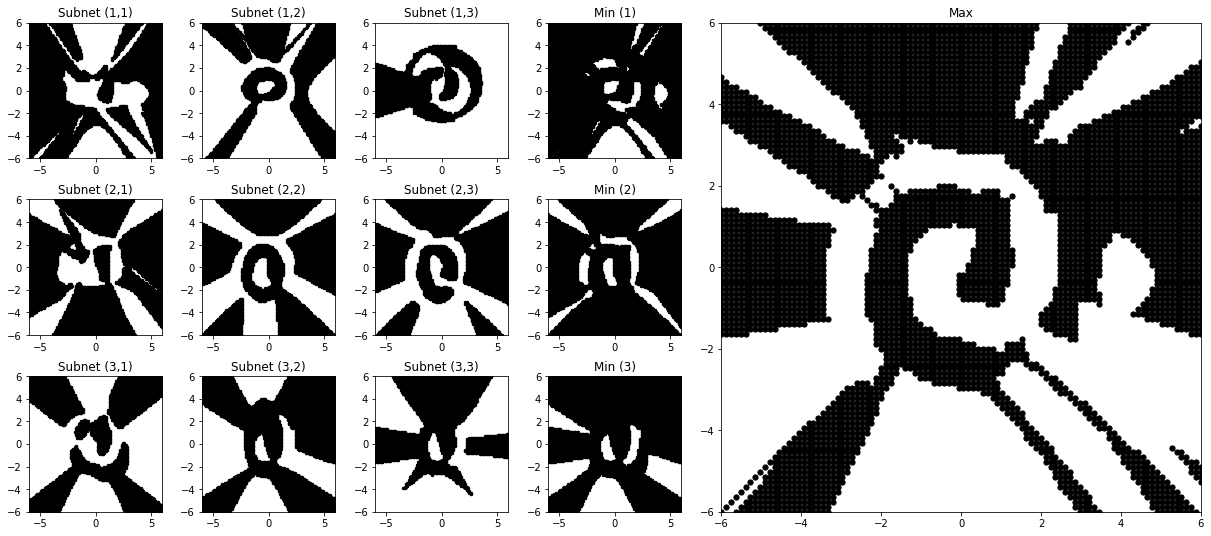

Test Error with 3 split: 0.1593


In [5]:
train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

for k in [2,3]:
    minmax_net = visualize_minmax(train_data, k, 4000, 42)
    test_error = test(minmax_net, test_data)
    print("Test Error with %d split: %.4f" % (k, test_error))

In [4]:
# Calculate the training time.

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

MAX_EPOCHS = 4000

for k in [2,3]:
    sum_max_time = 0
    sum_test_error = 0
    for random_seed in [57, 79, 131, 157, 201]:
        minmax_net, subnets, mins, max_time = minmax(train_data, k, MAX_EPOCHS, 0.05, random_seed)
        test_error = test(minmax_net, test_data)
        print(" %d split | Random Seed %3d | Max Time %4d s | Test Error %.4f" % (k, random_seed, max_time, test_error))
        sum_max_time += max_time
        sum_test_error += test_error
    print("! %d split | Avg Max Time %4d s | Avg Test Error %.4f" % (k, sum_max_time / 5, sum_test_error / 5))

Early Stop 1640 | T 0.0940 | V 0.1270:  46%|████▌     | 1840/4000 [01:00<01:11, 30.33epoch/s]
Early Stop 1000 | T 0.1096 | V 0.1335:  30%|███       | 1200/4000 [00:36<01:25, 32.64epoch/s]
Early Stop 3690 | T 0.0936 | V 0.1179:  97%|█████████▋| 3890/4000 [02:03<00:03, 31.55epoch/s]
Early Stop 1940 | T 0.0922 | V 0.1005:  54%|█████▎    | 2140/4000 [02:08<01:51, 16.62epoch/s]


 2 split | Random Seed  57 | Max Time  128 s | Test Error 0.1233


Early Stop  830 | T 0.0959 | V 0.1203:  26%|██▌       | 1030/4000 [00:57<02:44, 18.05epoch/s]
Early Stop 2010 | T 0.0853 | V 0.1131:  55%|█████▌    | 2210/4000 [02:28<02:00, 14.88epoch/s]
Early Stop  630 | T 0.1217 | V 0.1552:  21%|██        | 830/4000 [00:47<02:59, 17.61epoch/s]
Early Stop  600 | T 0.1211 | V 0.1471:  20%|██        | 800/4000 [00:42<02:51, 18.68epoch/s]


 2 split | Random Seed  79 | Max Time  148 s | Test Error 0.1415


Early Stop  290 | T 0.1273 | V 0.2262:  12%|█▏        | 490/4000 [00:33<03:58, 14.72epoch/s]
Early Stop 1080 | T 0.1109 | V 0.1760:  32%|███▏      | 1280/4000 [01:01<02:10, 20.88epoch/s]
Early Stop 1330 | T 0.1132 | V 0.1347:  38%|███▊      | 1530/4000 [01:16<02:03, 19.98epoch/s]
Early Stop  460 | T 0.1134 | V 0.1469:  16%|█▋        | 660/4000 [00:48<04:03, 13.73epoch/s]


 2 split | Random Seed 131 | Max Time   76 s | Test Error 0.1393


Early Stop 2960 | T 0.1010 | V 0.1484:  79%|███████▉  | 3160/4000 [02:42<00:43, 19.40epoch/s]
Early Stop 2120 | T 0.0938 | V 0.1096:  58%|█████▊    | 2320/4000 [02:23<01:44, 16.13epoch/s]
Early Stop 2110 | T 0.1003 | V 0.1185:  58%|█████▊    | 2310/4000 [02:11<01:36, 17.57epoch/s]
Early Stop 1330 | T 0.0888 | V 0.0943:  38%|███▊      | 1530/4000 [01:26<02:19, 17.65epoch/s]


 2 split | Random Seed 157 | Max Time  162 s | Test Error 0.1301


Early Stop  720 | T 0.1196 | V 0.1799:  23%|██▎       | 920/4000 [00:26<01:28, 34.94epoch/s]
Early Stop 1300 | T 0.0896 | V 0.1095:  38%|███▊      | 1500/4000 [00:43<01:12, 34.55epoch/s]
Early Stop 2040 | T 0.0993 | V 0.1242:  56%|█████▌    | 2240/4000 [01:16<00:59, 29.41epoch/s]
Early Stop 2000 | T 0.0954 | V 0.1139:  55%|█████▌    | 2200/4000 [01:10<00:57, 31.12epoch/s]


 2 split | Random Seed 201 | Max Time   76 s | Test Error 0.1354
! 2 split | Avg Max Time  118 s | Avg Test Error 0.1339


Early Stop 1980 | T 0.1031 | V 0.1194:  55%|█████▍    | 2180/4000 [00:41<00:34, 52.57epoch/s]
Early Stop  840 | T 0.1053 | V 0.1253:  26%|██▌       | 1040/4000 [00:19<00:55, 53.12epoch/s]
Early Stop 2320 | T 0.0607 | V 0.0678:  63%|██████▎   | 2520/4000 [00:48<00:28, 51.72epoch/s]
Early Stop  740 | T 0.0692 | V 0.0751:  24%|██▎       | 940/4000 [00:22<01:11, 42.63epoch/s]
Early Stop 2360 | T 0.0561 | V 0.0572:  64%|██████▍   | 2560/4000 [00:54<00:30, 47.23epoch/s]
Early Stop 1220 | T 0.0694 | V 0.0718:  36%|███▌      | 1420/4000 [00:26<00:48, 53.27epoch/s]
Best Epoch 3990 | T 0.0932 | V 0.1046: 100%|██████████| 4000/4000 [01:17<00:00, 51.93epoch/s]
Early Stop  270 | T 0.1203 | V 0.1431:  12%|█▏        | 470/4000 [00:10<01:21, 43.49epoch/s]
Early Stop  390 | T 0.1119 | V 0.1353:  15%|█▍        | 590/4000 [00:14<01:21, 41.80epoch/s]


 3 split | Random Seed  57 | Max Time   77 s | Test Error 0.1367


Early Stop  880 | T 0.1114 | V 0.1267:  27%|██▋       | 1080/4000 [00:24<01:06, 43.61epoch/s]
Early Stop 1400 | T 0.1234 | V 0.1439:  40%|████      | 1600/4000 [00:36<00:55, 43.32epoch/s]
Early Stop 1230 | T 0.0997 | V 0.1130:  36%|███▌      | 1430/4000 [00:31<00:55, 45.90epoch/s]
Early Stop 1020 | T 0.0945 | V 0.1063:  30%|███       | 1220/4000 [00:23<00:53, 52.33epoch/s]
Best Epoch 3820 | T 0.0660 | V 0.0683: 100%|██████████| 4000/4000 [01:16<00:00, 52.50epoch/s]
Early Stop 1620 | T 0.0617 | V 0.0721:  46%|████▌     | 1820/4000 [00:37<00:44, 49.13epoch/s]
Early Stop 1530 | T 0.1239 | V 0.1403:  43%|████▎     | 1730/4000 [00:41<00:53, 42.06epoch/s]
Early Stop  560 | T 0.0941 | V 0.1007:  19%|█▉        | 760/4000 [00:17<01:14, 43.54epoch/s]
Early Stop  970 | T 0.0897 | V 0.0917:  29%|██▉       | 1170/4000 [00:27<01:05, 43.31epoch/s]


 3 split | Random Seed  79 | Max Time   76 s | Test Error 0.1425


Early Stop  580 | T 0.1069 | V 0.1234:  20%|█▉        | 780/4000 [00:16<01:09, 46.28epoch/s]
Early Stop  950 | T 0.1043 | V 0.1142:  29%|██▉       | 1150/4000 [00:21<00:53, 53.74epoch/s]
Early Stop 1340 | T 0.0854 | V 0.0903:  38%|███▊      | 1540/4000 [00:29<00:46, 53.00epoch/s]
Early Stop 1530 | T 0.0910 | V 0.1038:  43%|████▎     | 1730/4000 [00:33<00:43, 51.72epoch/s]
Early Stop 1210 | T 0.0876 | V 0.0970:  35%|███▌      | 1410/4000 [00:26<00:49, 52.82epoch/s]
Early Stop  790 | T 0.1040 | V 0.1384:  25%|██▍       | 990/4000 [00:22<01:07, 44.81epoch/s]
Early Stop 1070 | T 0.1073 | V 0.1252:  32%|███▏      | 1270/4000 [00:29<01:03, 42.94epoch/s]
Early Stop 1410 | T 0.0719 | V 0.0769:  40%|████      | 1610/4000 [00:33<00:49, 48.63epoch/s]
Early Stop 1130 | T 0.0961 | V 0.1081:  33%|███▎      | 1330/4000 [00:25<00:51, 52.15epoch/s]


 3 split | Random Seed 131 | Max Time   33 s | Test Error 0.1695


Early Stop  720 | T 0.1256 | V 0.1620:  23%|██▎       | 920/4000 [00:16<00:56, 54.95epoch/s]
Early Stop  950 | T 0.0946 | V 0.1006:  29%|██▉       | 1150/4000 [00:21<00:52, 53.88epoch/s]
Early Stop  470 | T 0.0797 | V 0.0855:  17%|█▋        | 670/4000 [00:12<01:02, 53.65epoch/s]
Early Stop 1310 | T 0.0860 | V 0.1081:  38%|███▊      | 1510/4000 [00:27<00:46, 53.94epoch/s]
Early Stop  380 | T 0.0797 | V 0.0902:  14%|█▍        | 580/4000 [00:12<01:13, 46.64epoch/s]
Early Stop  320 | T 0.0519 | V 0.0571:  13%|█▎        | 520/4000 [00:11<01:18, 44.07epoch/s]
Early Stop 1490 | T 0.1185 | V 0.1484:  42%|████▏     | 1690/4000 [00:38<00:51, 44.45epoch/s]
Early Stop 3350 | T 0.0794 | V 0.0817:  89%|████████▉ | 3550/4000 [01:06<00:08, 53.45epoch/s]
Early Stop 2970 | T 0.0754 | V 0.0818:  79%|███████▉  | 3170/4000 [01:02<00:16, 50.60epoch/s]


 3 split | Random Seed 157 | Max Time   66 s | Test Error 0.1353


Early Stop  630 | T 0.1255 | V 0.1587:  21%|██        | 830/4000 [00:18<01:09, 45.39epoch/s]
Early Stop 1910 | T 0.1029 | V 0.1304:  53%|█████▎    | 2110/4000 [00:46<00:41, 45.04epoch/s]
Early Stop 1270 | T 0.0950 | V 0.1195:  37%|███▋      | 1470/4000 [00:32<00:55, 45.25epoch/s]
Early Stop  660 | T 0.0971 | V 0.1152:  22%|██▏       | 860/4000 [00:19<01:10, 44.84epoch/s]
Early Stop  800 | T 0.0677 | V 0.0713:  25%|██▌       | 1000/4000 [00:20<01:01, 48.55epoch/s]
Early Stop  310 | T 0.1056 | V 0.1123:  13%|█▎        | 510/4000 [00:10<01:09, 50.43epoch/s]
Early Stop 1070 | T 0.1148 | V 0.1388:  32%|███▏      | 1270/4000 [00:24<00:52, 52.40epoch/s]
Early Stop 1020 | T 0.0925 | V 0.0960:  30%|███       | 1220/4000 [00:23<00:53, 52.37epoch/s]
Early Stop 3760 | T 0.1053 | V 0.1189:  99%|█████████▉| 3960/4000 [01:17<00:00, 51.08epoch/s]


 3 split | Random Seed 201 | Max Time   77 s | Test Error 0.1453
! 3 split | Avg Max Time   66 s | Avg Test Error 0.1459
